In [37]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('2022_LoL_esports_match_data_from_OraclesElixir_20221104.csv',low_memory=False)

In [39]:
mask = ['JD Gaming', 'Top Esports', 'EDward Gaming', 'Gen.G', 'T1', 'DWG KIA', 'Rogue', 'G2 Esports', 'Cloud9',
        '100 Thieves', 'CTBC Flying Oyster', 'GAM Esports', 'Fnatic', 'Royal Never Give Up', 'DRX', 'Evil Geniuses']
results = []
for i in range(len(mask)):
    results.append(df[df['league'] == mask[i]])
df3 = df[(df['position'] == 'team')]
mask = ['JD Gaming', 'Top Esports', 'EDward Gaming', 'Gen.G', 'T1', 'DWG KIA', 'Rogue', 'G2 Esports', 'Cloud9',
        '100 Thieves', 'CTBC Flying Oyster', 'GAM Esports', 'Fnatic', 'Royal Never Give Up', 'DRX', 'Evil Geniuses']
results = []
for i in range(len(mask)):
    results.append(df3[df3['teamname'] == mask[i]])
df3 = pd.concat(results)
columns = list(df3.columns)
copy = columns
print(type(copy))
keep = ['datacompleteness','side', 'split', 'teamname', 'gamelength', 'result',
        'kills','deaths','assists','teamkills','teamdeaths','firstblood',  'team kpm', 'ckpm', 'damagetochampions', 
        'dpm', 'damagetakenperminute','elders', 'opp_elders','firstherald','heralds','opp_heralds','firstbaron','barons',
        'opp_barons', 'firsttower','towers','opp_towers','totalgold', 'earnedgold', 'earned gpm', 
        'goldspent', 'gspd']
for key in keep:
    copy.remove(key)
df3 = df3.drop(copy, axis=1)
pd.set_option('display.max_columns', None)
df3.shape
mask = df3['datacompleteness'] == 'partial'
partial = 0
for i in mask:
    if i == True:
        partial += 1
df3 = df3.dropna()
df3 = df3.drop('datacompleteness',axis = 1)
df3 = df3.drop('split',axis = 1)
df3
df3.side = df3.side.map({'Red':0, 'Blue':1})
df3.info()

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 2387 to 133222
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   side                  925 non-null    int64  
 1   teamname              925 non-null    object 
 2   gamelength            925 non-null    int64  
 3   result                925 non-null    int64  
 4   kills                 925 non-null    int64  
 5   deaths                925 non-null    int64  
 6   assists               925 non-null    int64  
 7   teamkills             925 non-null    int64  
 8   teamdeaths            925 non-null    int64  
 9   firstblood            925 non-null    float64
 10  team kpm              925 non-null    float64
 11  ckpm                  925 non-null    float64
 12  elders                925 non-null    float64
 13  opp_elders            925 non-null    float64
 14  firstherald           925 non-null    float64
 15  he

In [40]:
df3

,side,teamname,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,firstblood,team kpm,ckpm,elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,damagetochampions,dpm,damagetakenperminute,totalgold,earnedgold,earned gpm,goldspent,gspd
2387,0,Gen.G,1778,1,17,2,34,17,2,1.0,0.5737,0.6412,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,9.0,4.0,61323.0,2069.3926,2931.5973,58528,39019.0,1316.7267,53625.0,0.215909
2422,1,Gen.G,1556,1,23,9,44,23,9,0.0,0.8869,1.2339,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,11.0,0.0,79139.0,3051.6324,2878.7661,57160,39908.0,1538.8689,51225.0,0.289130
2999,0,Gen.G,2166,0,17,15,39,17,15,1.0,0.4709,0.8864,1.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,4.0,8.0,64648.0,1790.8033,2535.7895,62844,39371.0,1090.6094,61760.0,0.025167
3034,1,Gen.G,2887,1,20,24,44,20,24,0.0,0.4157,0.9144,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,10.0,5.0,122575.0,2547.4541,2961.6557,85927,55100.0,1145.1334,81410.0,0.002952
3059,0,Gen.G,2113,1,15,17,38,15,17,0.0,0.4259,0.9087,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,9.0,5.0,74666.0,2120.1893,2974.0180,64447,41520.0,1178.9872,58600.0,-0.002131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133103,0,Evil Geniuses,2168,1,22,4,61,22,4,0.0,0.6089,0.7196,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,11.0,3.0,109005.0,3016.7435,3114.2159,68583,45091.0,1247.9059,61945.0,0.135666
133163,0,Evil Geniuses,1773,0,7,11,12,7,11,0.0,0.2369,0.6091,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,7.0,43010.0,1455.4992,3022.9780,47354,27891.0,943.8579,45960.0,-0.052955
133198,1,Evil Geniuses,1834,1,16,1,43,16,1,1.0,0.5234,0.5562,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,10.0,1.0,67268.0,2200.6979,2246.7612,66071,45986.0,1504.4493,58225.0,0.304458
133211,0,Evil Geniuses,2002,0,5,16,11,5,16,1.0,0.1499,0.6294,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,10.0,46721.0,1400.2298,2381.3886,52143,30345.0,909.4406,50875.0,-0.157954


In [47]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [48]:
X_df = pd.get_dummies(df3.drop(columns = ['teamname']))
X_df.head()

,side,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,firstblood,team kpm,ckpm,elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,damagetochampions,dpm,damagetakenperminute,totalgold,earnedgold,earned gpm,goldspent,gspd
2387,0,1778,1,17,2,34,17,2,1.0,0.5737,0.6412,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,9.0,4.0,61323.0,2069.3926,2931.5973,58528,39019.0,1316.7267,53625.0,0.215909
2422,1,1556,1,23,9,44,23,9,0.0,0.8869,1.2339,0.0,0.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,11.0,0.0,79139.0,3051.6324,2878.7661,57160,39908.0,1538.8689,51225.0,0.289130
2999,0,2166,0,17,15,39,17,15,1.0,0.4709,0.8864,1.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,4.0,8.0,64648.0,1790.8033,2535.7895,62844,39371.0,1090.6094,61760.0,0.025167
3034,1,2887,1,20,24,44,20,24,0.0,0.4157,0.9144,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,10.0,5.0,122575.0,2547.4541,2961.6557,85927,55100.0,1145.1334,81410.0,0.002952
3059,0,2113,1,15,17,38,15,17,0.0,0.4259,0.9087,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,9.0,5.0,74666.0,2120.1893,2974.0180,64447,41520.0,1178.9872,58600.0,-0.002131


In [49]:
y_df = df3.teamname
y_df

2387              Gen.G
2422              Gen.G
2999              Gen.G
3034              Gen.G
3059              Gen.G
              ...      
133103    Evil Geniuses
133163    Evil Geniuses
133198    Evil Geniuses
133211    Evil Geniuses
133222    Evil Geniuses
Name: teamname, Length: 925, dtype: object

In [50]:
X = np.array(X_df)
X

array([[ 0.0000000e+00,  1.7780000e+03,  1.0000000e+00, ...,
         1.3167267e+03,  5.3625000e+04,  2.1590900e-01],
       [ 1.0000000e+00,  1.5560000e+03,  1.0000000e+00, ...,
         1.5388689e+03,  5.1225000e+04,  2.8913000e-01],
       [ 0.0000000e+00,  2.1660000e+03,  0.0000000e+00, ...,
         1.0906094e+03,  6.1760000e+04,  2.5167000e-02],
       ...,
       [ 1.0000000e+00,  1.8340000e+03,  1.0000000e+00, ...,
         1.5044493e+03,  5.8225000e+04,  3.0445800e-01],
       [ 0.0000000e+00,  2.0020000e+03,  0.0000000e+00, ...,
         9.0944060e+02,  5.0875000e+04, -1.5795400e-01],
       [ 1.0000000e+00,  1.8270000e+03,  0.0000000e+00, ...,
         9.6236450e+02,  4.7593000e+04, -1.3091400e-01]])

In [51]:
y = y_df.replace(['JD Gaming', 'Top Esports', 'EDward Gaming', 'Gen.G', 'T1', 'DWG KIA', 'Rogue', 'G2 Esports', 'Cloud9',
        '100 Thieves', 'CTBC Flying Oyster', 'GAM Esports', 'Fnatic', 'Royal Never Give Up', 'DRX', 'Evil Geniuses'], [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
y = np.array(y)
y

array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

In [52]:
from sklearn import tree 

In [53]:
clf_tree = tree.DecisionTreeClassifier(max_depth = 3)
clf_tree = clf_tree.fit(X, y)

In [54]:
clf_tree.predict(X)

array([ 3,  3, 14, 14, 14,  3,  3, 14,  3,  3,  3,  5, 14,  5,  5,  3,  3,
       14, 14,  3,  3,  3,  3,  3,  3,  3,  3, 14, 14, 14,  5,  3,  3, 14,
        5,  3,  3,  3,  5,  3,  5,  5,  5,  3, 14, 14, 11, 14, 14,  3,  3,
        3,  3,  3, 14,  3,  3,  3,  3,  5,  3, 14,  3, 14, 14,  3,  3,  3,
        3,  3,  3, 14, 11,  3,  3,  3,  3,  5,  3,  3,  3,  3, 11, 14, 14,
        3,  5, 14, 14, 11,  3, 14,  3,  3,  3,  5, 14,  3,  5,  5,  5,  3,
        3,  3,  5, 14, 14,  5, 14,  3,  3,  5,  3,  5,  3,  3, 11,  4,  5,
       14,  5,  3, 14,  3,  3,  3,  5,  3, 14,  5, 14,  3,  3,  4, 14,  3,
        3,  5,  3,  3,  3,  3, 14, 11, 14,  3,  3,  3, 14,  3,  3,  3,  3,
        3,  3,  3, 14, 14, 14, 14, 14,  3,  5,  5,  4, 14, 14,  3,  3,  3,
       14,  3,  5, 14,  3,  5,  3, 14,  5,  5, 14,  3,  3,  3, 14,  3, 14,
       14,  3,  3,  3,  3, 14, 14,  5, 14, 14, 14,  5,  3,  5, 14, 14, 14,
        5,  5,  5,  5,  3,  3,  5, 14, 14,  5,  5,  3,  5,  5,  5,  5,  5,
        5,  5, 14, 14,  5

In [55]:
print(tree.export_text(clf_tree, feature_names = list(X_df.columns)) )

|--- ckpm <= 1.24
|   |--- earned gpm <= 1259.76
|   |   |--- damagetakenperminute <= 2487.82
|   |   |   |--- class: 5
|   |   |--- damagetakenperminute >  2487.82
|   |   |   |--- class: 14
|   |--- earned gpm >  1259.76
|   |   |--- assists <= 63.50
|   |   |   |--- class: 3
|   |   |--- assists >  63.50
|   |   |   |--- class: 7
|--- ckpm >  1.24
|   |--- dpm <= 2546.30
|   |   |--- earned gpm <= 1560.36
|   |   |   |--- class: 11
|   |   |--- earned gpm >  1560.36
|   |   |   |--- class: 4
|   |--- dpm >  2546.30
|   |   |--- assists <= 76.00
|   |   |   |--- class: 11
|   |   |--- assists >  76.00
|   |   |   |--- class: 5



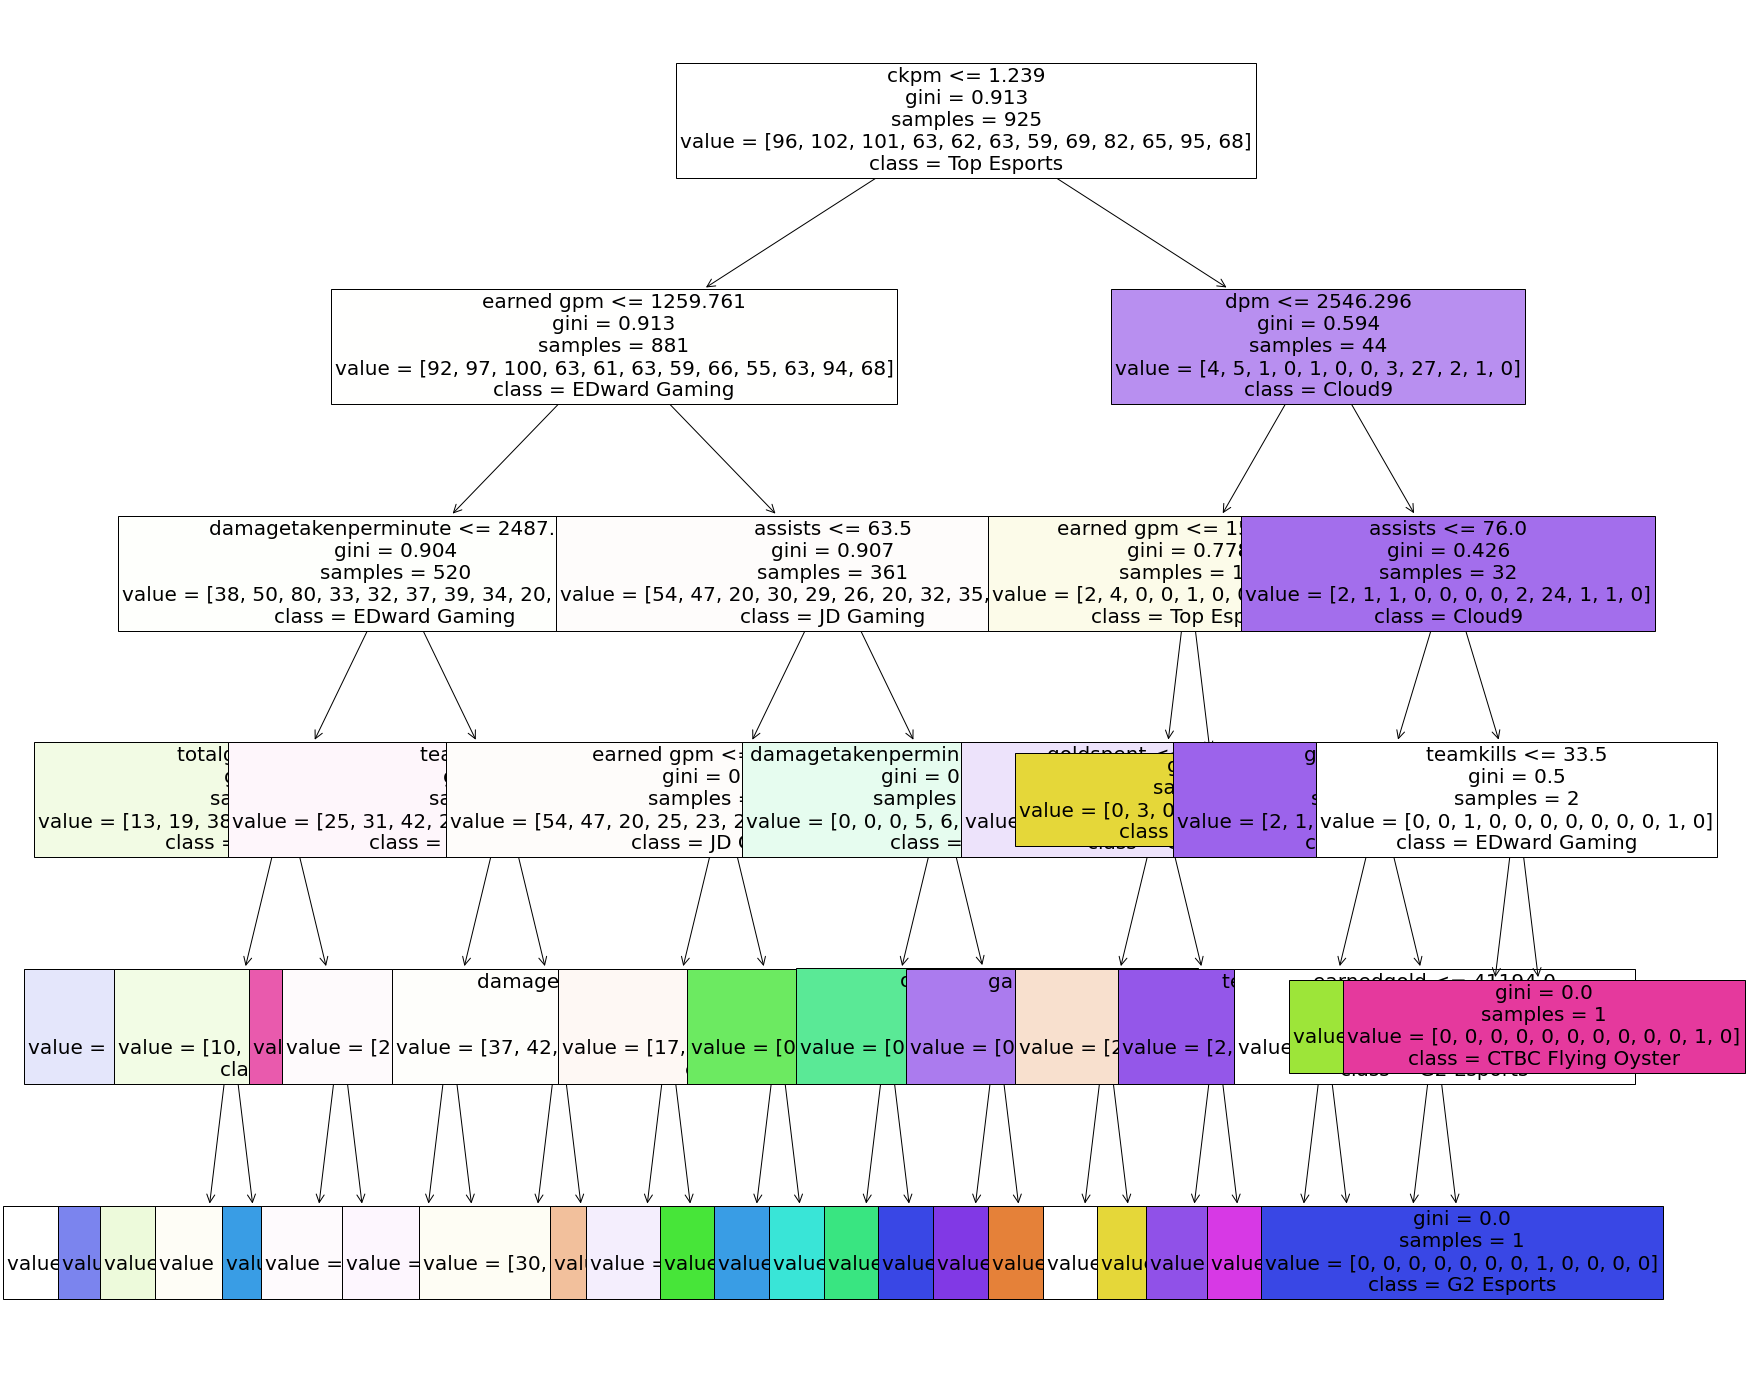

In [56]:
clf_tree = tree.DecisionTreeClassifier(max_depth = 5)
clf_tree = clf_tree.fit(X, y)
fig = plt.figure(figsize = (25,25))
_= tree.plot_tree(clf_tree, feature_names = X_df.columns, 
                  class_names =  ['JD Gaming', 'Top Esports', 'EDward Gaming', 'Gen.G', 'T1', 'DWG KIA', 'Rogue', 'G2 Esports', 'Cloud9',
        '100 Thieves', 'CTBC Flying Oyster', 'GAM Esports', 'Fnatic', 'Royal Never Give Up', 'DRX', 'Evil Geniuses'], 
                  
               filled = True, 
              fontsize = 20)

In [57]:
X_pair = X[:,:2]
clf_pair = tree.DecisionTreeClassifier(max_depth = 5).fit(X_pair, y)

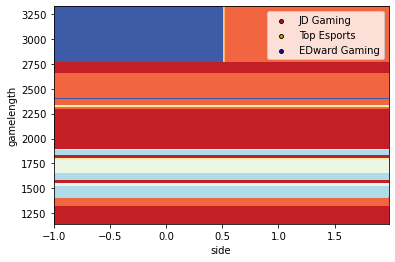

In [58]:
x0_min = X[:,0].min()-1
x0_max = X[:,0].max()+1
x1_min = X[:,1].min()-1
x1_max = X[:,1].max()+1

# Parameters
n_classes = 16
plot_colors = "ryb"
plot_step = 0.02

xx, yy = np.meshgrid(
    np.arange(x0_min, x0_max, plot_step), np.arange(x1_min, x1_max, plot_step)
)
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf_pair.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(X_df.columns[0])
plt.ylabel(X_df.columns[1])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=['JD Gaming', 'Top Esports', 'EDward Gaming', 'Gen.G', 'T1', 'DWG KIA', 'Rogue', 'G2 Esports', 'Cloud9',
        '100 Thieves', 'CTBC Flying Oyster', 'GAM Esports', 'Fnatic', 'Royal Never Give Up', 'DRX', 'Evil Geniuses'][i],
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )
plt.legend()